In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets, Sequential
from tensorflow.keras.layers import Conv2D,Activation,MaxPooling2D,Dropout,Flatten,Dense
import  os
import numpy as np
import matplotlib.pyplot as plt

# 1. Data Preparation

In [2]:
#download Cifar-10 dataset
(x_train,y_train), (x_test, y_test) = datasets.cifar10.load_data()
#print the size of the dataset
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print(y_train[0])

#Convert the category label into onehot encoding 
num_classes = 10
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)
y_train[0]

170500096/170498071 [==============================] - 146s 1us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
[6]


array([6], dtype=uint8)

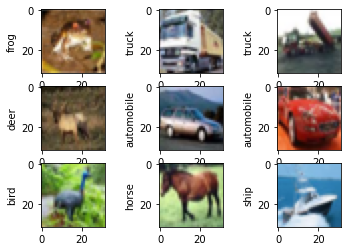

In [3]:
# Show the first 9 images
#Create a image tag list
category_dict = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',
                 6:'frog',7:'horse',8:'ship',9:'truck'}
#Show the first 9 images and their labels
plt.figure()
for i in range(9):
    #create a figure with 9 subplots
    plt.subplot(3,3,i+1)
    #show an image
    plt.imshow(x_train[i])
    #show the label
    plt.ylabel(category_dict[y_train[i][0]])
plt.show()

In [4]:
#Pixel normalization
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

# 2. Model Definition

In [5]:
# Create the model
def CNN_classification_model(input_size = x_train.shape[1:]):
    model = Sequential() 
    #the first block with 2 convolutional layers and 1 maxpooling layer
    '''Conv1 with 32 3*3 kernels 
        padding="same": it applies zero padding to the input image so that the input image gets fully covered by the filter and specified stride.
        It is called SAME because, for stride 1 , the output will be the same as the input.
        output: 32*32*32'''
    model.add(Conv2D(32, (3, 3), padding='same', 
              input_shape=input_size)) 
    #relu activation function
    model.add(Activation('relu')) 
    #Conv2
    model.add(Conv2D(32, (3, 3))) 
    model.add(Activation('relu')) 
    #maxpooling 
    model.add(MaxPooling2D(pool_size=(2, 2),strides =1)) 

    #the second block
    model.add(Conv2D(64, (3, 3), padding='same')) 
    model.add(Activation('relu')) 
    model.add(Conv2D(64, (3, 3))) 
    model.add(Activation('relu')) 
    #maxpooling.the default strides =1
    model.add(MaxPooling2D(pool_size=(2, 2))) 
  

    #Before sending a feature map into a fully connected network, it should be flattened into a column vector. 
    model.add(Flatten()) 
    #fully connected layer
    model.add(Dense(128)) 
    model.add(Activation('relu')) 
    #dropout layer.every neuronis set to 0 with a probability of 0.25
    model.add(Dropout(0.25))
    model.add(Dense(num_classes))
    #map the score of each class into probability
    model.add(Activation('softmax')) 
    
    opt = keras.optimizers.Adam(lr=0.0001)
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy']) 
    return model

# 3. Model Training

In [6]:
# Train the model
model = CNN_classification_model()
from tensorflow.keras.callbacks import ModelCheckpoint
model_name = "final_cifar10.h5"
model_checkpoint = ModelCheckpoint(model_name, eye='loss',verbose=1, save_best_only=True)

#load pretrained models
trained_weights_path = 'cifar10_weights.h5'
if os.path.exists(trained_weights_path):
    model.load_weights(trained_weights_path, by_name =True)
#train
model.fit(x_train,y_train, batch_size=32, epochs=10,callbacks = [model_checkpoint],verbose=1)

Epoch 1/10
1563/1563 [==============================] - 332s 213ms/step - loss: 1.6478 - accuracy: 0.3986
Epoch 2/10
1563/1563 [==============================] - 309s 198ms/step - loss: 1.3213 - accuracy: 0.5309
Epoch 3/10
1563/1563 [==============================] - 326s 209ms/step - loss: 1.1815 - accuracy: 0.5823
Epoch 4/10
1563/1563 [==============================] - 315s 201ms/step - loss: 1.0773 - accuracy: 0.6228
Epoch 5/10
1563/1563 [==============================] - 309s 197ms/step - loss: 0.9953 - accuracy: 0.6527
Epoch 6/10
1563/1563 [==============================] - 308s 197ms/step - loss: 0.9296 - accuracy: 0.6763
Epoch 7/10
1563/1563 [==============================] - 314s 201ms/step - loss: 0.8776 - accuracy: 0.6912
Epoch 8/10
1563/1563 [==============================] - 308s 197ms/step - loss: 0.8249 - accuracy: 0.7104
Epoch 9/10
1563/1563 [==============================] - 299s 191ms/step - loss: 0.7811 - accuracy: 0.7270
Epoch 10/10
1563/1563 [=======================

# 4. Model Evaluation

In [7]:
# Model evaluation 
model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 15s 47ms/step - loss: 0.8494 - accuracy: 0.7002


[0.8493854403495789, 0.7002000212669373]

# 5. Model Deployment

In [8]:
# Predict on a single image
#output the possibility of each class
model.predict(x_test[0:1])

array([[0.03427925, 0.00136035, 0.01441956, 0.8110219 , 0.00120945,
        0.01231995, 0.01586891, 0.00259486, 0.10493882, 0.00198697]],
      dtype=float32)

In [9]:
#output the predicted label
model.predict_classes(x_test[0:1])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([3], dtype=int64)

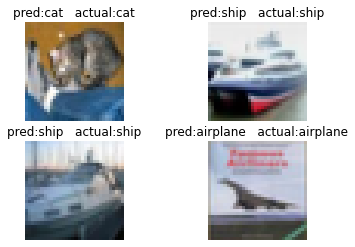

In [10]:
# Plot the first 4 images in the test set and their corresponding predicted labels.
#label list
pred_list = []

plt.figure()
for i in range(0,4):
    plt.subplot(2,2,i+1)
    #plot
    plt.imshow(x_test[i])
    #predict
    pred = model.predict_classes(x_test[0:10])
    pred_list.append(pred)
    #Display actual and predicted labels of images
    plt.title("pred:"+category_dict[pred[i]]+"   actual:"+ category_dict[y_test[i][0]])
    plt.axis('off')
plt.show()